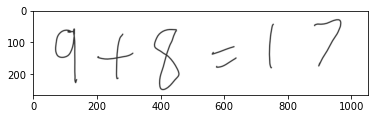

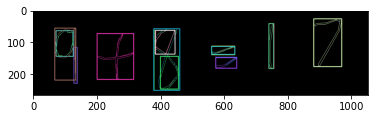

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import random as rng

threshold = 200
filename = 'testequations/testequation1.png'
im = cv.imread(filename)
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, threshold, 255, cv.THRESH_BINARY_INV)
canny_output = cv.Canny(thresh, threshold, threshold * 2)
contours, hierarchy = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# arguments contain source image and contour retrieval methods
# each individual contour is a numpy array of (x,y) coordinates of boundary points
# of the object
# SIMPLE reduces number of points

contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
# apply approximation to polygons with accuracy +-3
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)    

for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours_poly, i, color)
        cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
          (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
        #cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)

#Display
#source_window = 'Source'
#cv.namedWindow(source_window)
#cv.imshow(source_window, im)
#cv.imshow('Contours', drawing)
plt.imshow(im)
plt.show()
plt.imshow(drawing)
plt.show()

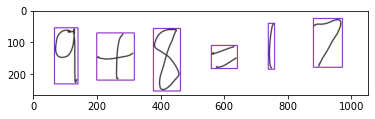

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('testequations/testequation1.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

cnts, _ = cv2.findContours(img_dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Array of initial bounding rects
rects = []

# Bool array indicating which initial bounding rect has
# already been used
rectsUsed = []

# Just initialize bounding rects and set all bools to false
for cnt in cnts:
    rects.append(cv2.boundingRect(cnt))
    rectsUsed.append(False)

# Sort bounding rects by x coordinate
def getXFromRect(item):
    return item[0]

rects.sort(key = getXFromRect)

# Array of accepted rects
acceptedRects = []

# Merge threshold for x and y coordinate distance
xThr = 5

# Iterate all initial bounding rects
for supIdx, supVal in enumerate(rects):
    if (rectsUsed[supIdx] == False):

        # Initialize current rect
        currxMin = supVal[0]
        currxMax = supVal[0] + supVal[2]
        curryMin = supVal[1]
        curryMax = supVal[1] + supVal[3]

        # This bounding rect is used
        rectsUsed[supIdx] = True

        # Iterate all initial bounding rects
        # starting from the next
        for subIdx, subVal in enumerate(rects[(supIdx+1):], start = (supIdx+1)):

            # Initialize merge candidate
            candxMin = subVal[0]
            candxMax = subVal[0] + subVal[2]
            candyMin = subVal[1]
            candyMax = subVal[1] + subVal[3]

            # Check if x distance between current rect
            # and merge candidate is small enough
            if (candxMin <= currxMax + xThr):

                # Reset coordinates of current rect
                currxMax = candxMax
                curryMin = min(curryMin, candyMin)
                curryMax = max(curryMax, candyMax)

                # Merge candidate (bounding rect) is used
                rectsUsed[subIdx] = True
            else:
                break

        # No more merge candidates possible, accept current rect
        acceptedRects.append([currxMin, curryMin, currxMax - currxMin, curryMax - curryMin])

'''
for rect in rects:
    img3 = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (121, 11, 189), 2)
plt.imshow(img3)
plt.show()
'''

for rect in acceptedRects:
    img2 = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (121, 11, 189), 2)
    #img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255,255,255), 2)
#cv2.imwrite("images/result.png", image)
plt.imshow(img2)
plt.show()

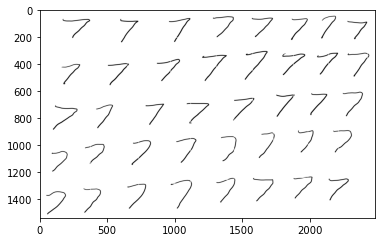

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#image = cv2.imread('testequations/testequation2.png')
image = cv2.imread('Moresymbols/7s1.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

cnts, _ = cv2.findContours(img_dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Array of initial bounding rects
rects = []

# Bool array indicating which initial bounding rect has
# already been used
rectsUsed = []

# Just initialize bounding rects and set all bools to false
for cnt in cnts:
    rects.append(cv2.boundingRect(cnt))
    rectsUsed.append(False)

# Sort bounding rects by x coordinate
def getXFromRect(item):
    return item[0]

rects.sort(key = getXFromRect)

# Array of accepted rects
acceptedRects = []

# Merge threshold for x and y coordinate distance
yThr = 1

# Iterate all initial bounding rects
for supIdx, supVal in enumerate(rects):
    if (rectsUsed[supIdx] == False):

        # Initialize current rect
        currxMin = supVal[0]
        currxMax = supVal[0] + supVal[2]
        curryMin = supVal[1]
        curryMax = supVal[1] + supVal[3]

        # This bounding rect is used
        rectsUsed[supIdx] = True

        # Iterate all initial bounding rects
        # starting from the next
        for subIdx, subVal in enumerate(rects[(supIdx+1):], start = (supIdx+1)):

            # Initialize merge candidate
            candxMin = subVal[0]
            candxMax = subVal[0] + subVal[2]
            candyMin = subVal[1]
            candyMax = subVal[1] + subVal[3]

            # Check if x distance between current rect
            # and merge candidate is small enough
            if (candyMin <= curryMax + yThr):

                # Reset coordinates of current rect
                curryMax = candyMax
                currxMin = min(currxMin, candxMin)
                currxMax = max(currxMax, candxMax)

                # Merge candidate (bounding rect) is used
                rectsUsed[subIdx] = True
            else:
                break

        # No more merge candidates possible, accept current rect
        acceptedRects.append([currxMin, curryMin, currxMax - currxMin, curryMax - curryMin])
'''
for rect in rects:
    img3 = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (121, 11, 189), 2)
plt.imshow(img3)
plt.show()
'''
        
for rect in acceptedRects:
    img2 = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (121, 11, 189), 2)
    img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255,255,255), 2)
#cv2.imwrite("images/result.png", image)
plt.imshow(img2)
plt.show()

[(45, 1339, 149, 174), (84, 1041, 122, 155), (94, 701, 185, 186), (158, 397, 141, 154), (166, 64, 207, 145), (321, 1317, 132, 184), (332, 989, 149, 151), (414, 698, 129, 178), (501, 392, 159, 166), (593, 64, 138, 177), (645, 1283, 143, 188), (676, 962, 148, 185), (780, 691, 141, 160), (864, 360, 175, 168), (954, 58, 162, 180), (966, 1255, 162, 215), (1008, 945, 153, 187), (1085, 686, 170, 156), (1200, 330, 186, 197), (1279, 45, 158, 158), (1305, 1240, 144, 185), (1339, 932, 118, 188), (1429, 648, 161, 171), (1515, 301, 173, 216), (1567, 55, 161, 147), (1576, 1240, 155, 177), (1619, 904, 121, 192), (1748, 623, 140, 168), (1794, 319, 173, 164), (1858, 60, 127, 163), (1877, 1230, 143, 166), (1910, 888, 118, 167), (2001, 613, 129, 166), (2051, 314, 159, 165), (2081, 41, 114, 171), (2137, 1244, 152, 166), (2172, 887, 140, 168), (2241, 602, 153, 186), (2276, 78, 150, 140), (2277, 314, 164, 180)]


ValueError: zero-size array to reduction operation minimum which has no identity

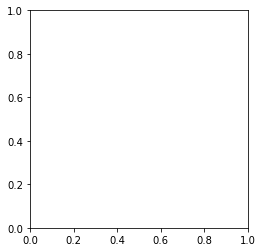

In [3]:
img_symbols = list()
print(rects)
for rect in acceptedRects:
    crop_img = img[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
    img_symbols.append(crop_img)
    plt.imshow(crop_img)
    plt.show()

In [26]:
for img_symbol in img_symbols:
    print(img_symbol.shape)

(175, 74, 3)
(147, 118, 3)
(195, 85, 3)
(72, 82, 3)
(143, 20, 3)
(152, 91, 3)


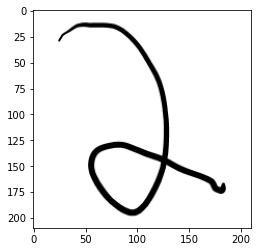

(210, 210, 3)


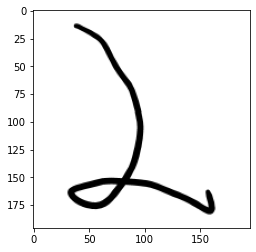

(196, 195, 3)


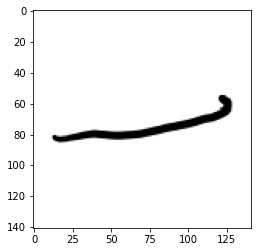

(141, 141, 3)


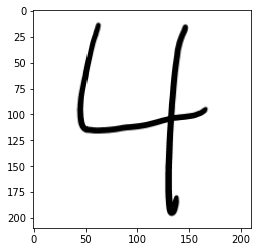

(210, 210, 3)


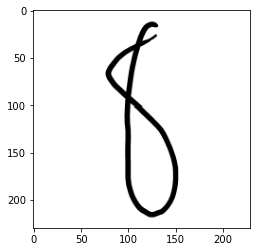

(230, 229, 3)


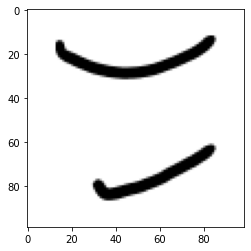

(99, 99, 3)


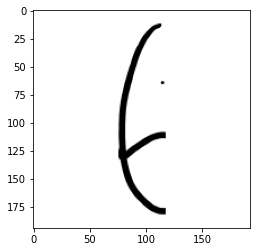

(194, 193, 3)


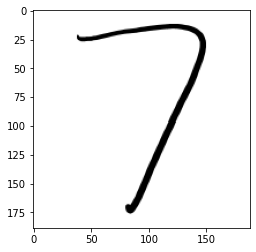

(189, 188, 3)


In [62]:
value=[255,255,255]
imgs_final = list()
for img_symbol in img_symbols:
    if img_symbol.shape[0] > img_symbol.shape[1]:
        top = 10
        bottom = top
        left = int(((img_symbol.shape[0] + top + bottom) - img_symbol.shape[1]) / 2)
        right = left
    else:
        left = 10
        right = left
        top = int(((img_symbol.shape[1] + left + right) - img_symbol.shape[0]) / 2)
        bottom = top
    img_border = cv2.copyMakeBorder(img_symbol, top, bottom, left, right, cv2.BORDER_CONSTANT,None, value)
    imgs_final.append(img_border)
    plt.imshow(img_border)
    plt.show()
    print(img_border.shape)

In [49]:
i = 0
filename = lambda j: "testsymbols/image"+str(j)+".png"
for img_final in imgs_final:
    while cv2.haveImageReader(filename(i)) :
        i += 1
        #print(filename(i))
    cv2.imwrite(filename(i), img_final)

testsymbols/image1.png
testsymbols/image2.png
testsymbols/image3.png
testsymbols/image4.png
testsymbols/image5.png
testsymbols/image6.png
testsymbols/image7.png
testsymbols/image8.png
testsymbols/image9.png
testsymbols/image10.png
testsymbols/image11.png


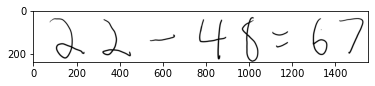

[(1124, 141, 60, 30), (539, 107, 121, 35), (1107, 92, 77, 24), (1332, 83, 7, 7), (767, 36, 130, 190), (319, 36, 137, 176), (1294, 32, 72, 174), (75, 32, 166, 190), (1417, 31, 116, 169), (965, 26, 81, 210)]


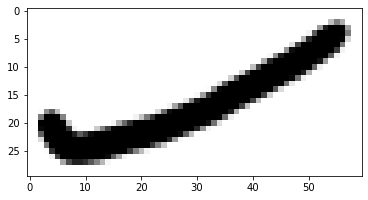

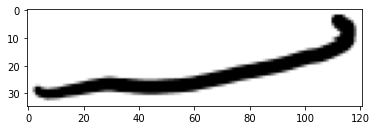

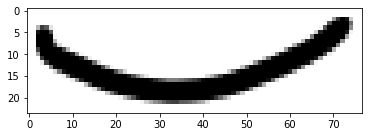

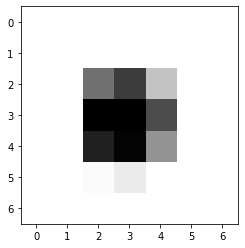

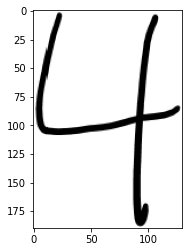

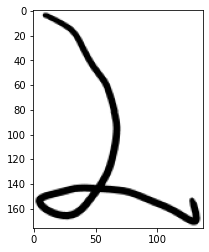

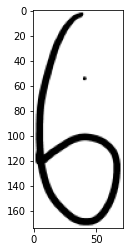

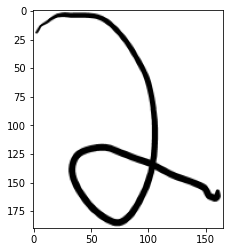

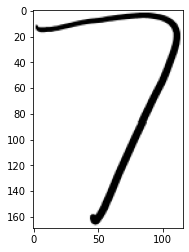

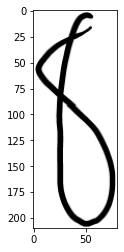

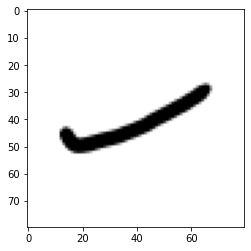

(80, 80, 3)


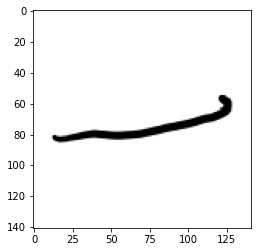

(141, 141, 3)


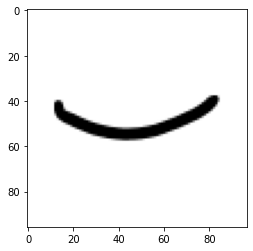

(96, 97, 3)


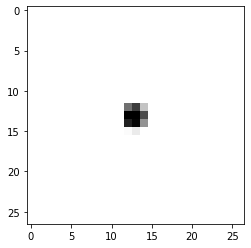

(27, 27, 3)


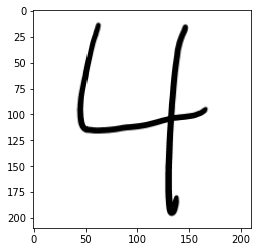

(210, 210, 3)


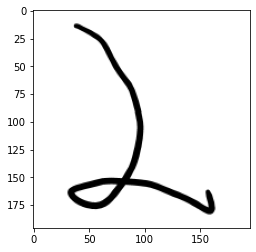

(196, 195, 3)


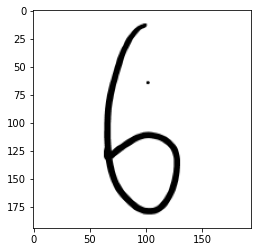

(194, 194, 3)


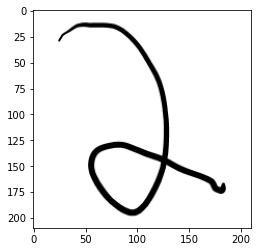

(210, 210, 3)


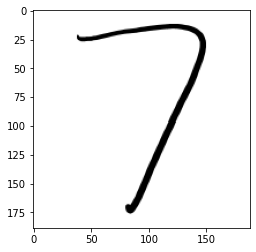

(189, 188, 3)


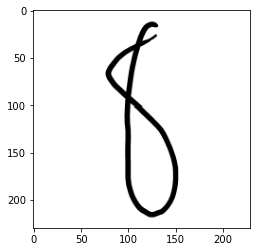

(230, 229, 3)


In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('testequations/testequation3.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

cnts, _ = cv2.findContours(img_dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Array of initial bounding rects
rects = []

# Bool array indicating which initial bounding rect has
# already been used
rectsUsed = []

# Just initialize bounding rects and set all bools to false
for cnt in cnts:
    rects.append(cv2.boundingRect(cnt))

for rect in rects:
    #img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (121, 11, 189), 2)
    img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255,255,255), 2)
plt.imshow(img)
plt.show()
# cropping the image 
img_symbols = list()
print(rects)
for rect in rects:
    crop_img = img[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
    img_symbols.append(crop_img)
    plt.imshow(crop_img)
    plt.show()
value=[255,255,255]
imgs_final = list()
for img_symbol in img_symbols:
    if img_symbol.shape[0] > img_symbol.shape[1]:
        top = 10
        bottom = top
        left = int(((img_symbol.shape[0] + top + bottom) - img_symbol.shape[1]) / 2)
        right = left
    else:
        left = 10
        right = left
        top = int(((img_symbol.shape[1] + left + right) - img_symbol.shape[0]) / 2)
        bottom = top
    img_border = cv2.copyMakeBorder(img_symbol, top, bottom, left, right, cv2.BORDER_CONSTANT,None, value)
    imgs_final.append(img_border)
    plt.imshow(img_border)
    plt.show()
    print(img_border.shape)
filename = lambda j: "testsymbols/"+str(rects[j][0])+"_"+str(rects[j][1])+"_"+str(rects[j][2])+"_"+str(rects[j][3])+".png"
for i in range(0,len(imgs_final)):
    cv2.imwrite(filename(i), imgs_final[i])

In [26]:
print(rects[0])

(1124, 141, 60, 30)


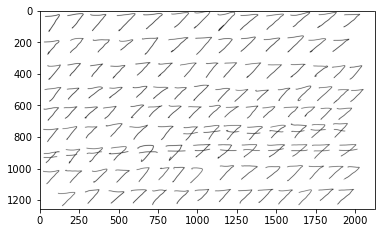

[(112, 1147, 113, 92), (433, 1137, 104, 86), (849, 1136, 96, 90), (710, 1132, 96, 101), (1637, 1131, 87, 102), (1510, 1131, 94, 98), (1255, 1131, 92, 92), (575, 1130, 104, 92), (284, 1130, 95, 95), (1883, 1128, 110, 101), (1108, 1128, 105, 85), (980, 1128, 94, 79), (1379, 1127, 102, 92), (1763, 1126, 101, 80), (18, 1008, 106, 92), (476, 1005, 94, 85), (158, 1005, 110, 88), (328, 999, 100, 91), (951, 992, 83, 102), (750, 991, 72, 84), (610, 991, 86, 95), (838, 988, 82, 101), (1922, 984, 106, 89), (1428, 984, 97, 82), (1829, 982, 99, 85), (1702, 980, 100, 90), (1274, 978, 108, 94), (1565, 977, 104, 104), (1138, 977, 93, 98), (21, 889, 106, 77), (162, 873, 94, 96), (292, 864, 108, 97), (435, 857, 128, 93), (615, 848, 133, 110), (794, 847, 131, 105), (1124, 845, 126, 93), (1893, 844, 123, 80), (1591, 844, 108, 81), (1438, 844, 117, 86), (1277, 844, 119, 86), (1723, 843, 116, 96), (969, 843, 114, 87), (18, 743, 102, 90), (906, 731, 98, 92), (283, 730, 82, 80), (1309, 729, 104, 90), (140, 72

In [17]:
#getting 7s

import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('Moresymbols/7s9.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

cnts, _ = cv2.findContours(img_dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Array of initial bounding rects
rects = []

# Bool array indicating which initial bounding rect has
# already been used
rectsUsed = []

# Just initialize bounding rects and set all bools to false
for cnt in cnts:
    rects.append(cv2.boundingRect(cnt))

for rect in rects:
    #img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (121, 11, 189), 2)
    img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255,255,255), 2)
plt.imshow(img)
plt.show()
# cropping the image 
img_symbols = list()
print(rects)
for rect in rects:
    crop_img = img[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
    img_symbols.append(crop_img)
    #plt.imshow(crop_img)
    #plt.show()
value=[255,255,255]
imgs_final = list()
for img_symbol in img_symbols:
    if img_symbol.shape[0] > img_symbol.shape[1]:
        top = 10
        bottom = top
        left = int(((img_symbol.shape[0] + top + bottom) - img_symbol.shape[1]) / 2)
        right = left
    else:
        left = 10
        right = left
        top = int(((img_symbol.shape[1] + left + right) - img_symbol.shape[0]) / 2)
        bottom = top
    img_border = cv2.copyMakeBorder(img_symbol, top, bottom, left, right, cv2.BORDER_CONSTANT,None, value)
    imgs_final.append(img_border)
    #plt.imshow(img_border)
    #plt.show()
    #print(img_border.shape)
i = 0
filename = lambda j: "Moresymbols/7_"+str(j)+".png"
for img_final in imgs_final:
    while cv2.haveImageReader(filename(i)) :
        i += 1
        #print(filename(i))
    img_final = cv2.resize(img_final, dsize=(45,45),interpolation=cv2.INTER_CUBIC)
    #plt.imshow(img_final)
    #plt.show()
    cv2.imwrite(filename(i), img_final)

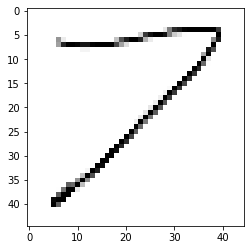

208


In [20]:

from os import listdir
import os
plt.imshow(img_final)
plt.show()
print(len(listdir('Moresymbols')))
for i in range(0,len(listdir('Moresymbols'))):
    os.rename('Moresymbols/7_'+str(i)+'.png','Moresymbols/7_'+str(i+800)+'.png')
#1007 last 7